# Table of Contents
- Data Loading and Initial Setup  
- Data Overview and Structure  
- Data Quality Assessment  
- Descriptive Statistics  
- Temporal Analysis  
- Comparative Analysis Between Cities



# 1. Data Loading and Initial Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
url = "https://raw.githubusercontent.com/MIT-Emerging-Talent/ET6-CDSP-group-01-repo/refs/heads/main/1_datasets/raw_data/Rainfall_Data.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,City,Date,Year,Month,Rainfall_mm
0,Kampala,2005-01-01,2005,1,41.632484
1,Addis Ababa,2005-01-01,2005,1,44.480564
2,Kampala,2005-02-01,2005,2,28.327267
3,Addis Ababa,2005-02-01,2005,2,19.762764
4,Kampala,2005-03-01,2005,3,154.920380


# 2. Data Overview and Structure

Display basic information about the dataset

In [ ]:
df.shape

(490, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         490 non-null    object 
 1   Date         490 non-null    object 
 2   Year         490 non-null    int64  
 3   Month        490 non-null    int64  
 4   Rainfall_mm  490 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 19.3+ KB


In [ ]:
df['City'].unique()

array(['Kampala', 'Addis Ababa'], dtype=object)

# 3. Data Quality Assessment

In [ ]:
# Check for missing values
df.isnull().sum()

,0
City,0
Date,0
Year,0
Month,0
Rainfall_mm,0


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Data type verification
df.dtypes

,0
City,object
Date,object
Year,int64
Month,int64
Rainfall_mm,float64


In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Check for outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

rainfall_outliers = detect_outliers_iqr(df['Rainfall_mm'])
print(f"Number of rainfall outliers: {len(rainfall_outliers)}")
print(f"Percentage of outliers: {len(rainfall_outliers)/len(df)*100:.2f}%")

if len(rainfall_outliers) > 0:
    print(f"Outlier range: {rainfall_outliers.min():.2f} - {rainfall_outliers.max():.2f} mm")

Number of rainfall outliers: 33
Percentage of outliers: 6.73%
Outlier range: 281.98 - 401.51 mm


# 4. Descriptive Statistics

In [ ]:
# Overall statistics
df['Rainfall_mm'].describe()

,Rainfall_mm
count,490.000000
mean,101.160537
std,84.596569
min,4.817798
25%,38.341878
50%,81.394805
75%,134.412015
max,401.511630


In [ ]:
# Statistics by city
df.groupby('City')['Rainfall_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Addis Ababa,245.0,96.746881,106.192905,4.817798,15.222871,48.76293,134.71994,401.51163
Kampala,245.0,105.574193,55.013052,10.718299,61.712616,99.89554,133.48824,281.97600


In [ ]:
# Additional statistics
for city in df['City'].unique():
    city_data = df[df['City'] == city]['Rainfall_mm']
    print(f"\n{city}:")
    print(f"  Coefficient of Variation: {(city_data.std()/city_data.mean())*100:.2f}%")
    print(f"  Skewness: {city_data.skew():.3f}")
    print(f"  Kurtosis: {city_data.kurtosis():.3f}")



Kampala:
  Coefficient of Variation: 52.11%
  Skewness: 0.659
  Kurtosis: -0.029

Addis Ababa:
  Coefficient of Variation: 109.76%
  Skewness: 1.261
  Kurtosis: 0.298


In [ ]:
# Monthly statistics
df.groupby('Month')['Rainfall_mm'].agg(['mean', 'std', 'min', 'max']).round(2)

,mean,std,min,max
Month,,,,
1,39.63,31.26,10.23,125.25
2,37.25,27.44,7.01,125.34
3,102.42,61.12,17.25,237.79
4,132.90,61.51,31.11,247.25
5,93.06,55.33,9.76,218.87
6,83.27,34.91,24.10,154.63
7,178.27,133.46,21.89,401.51
8,199.45,108.25,47.02,361.49
9,147.04,53.98,52.14,328.69



# 5. Temporal Analysis

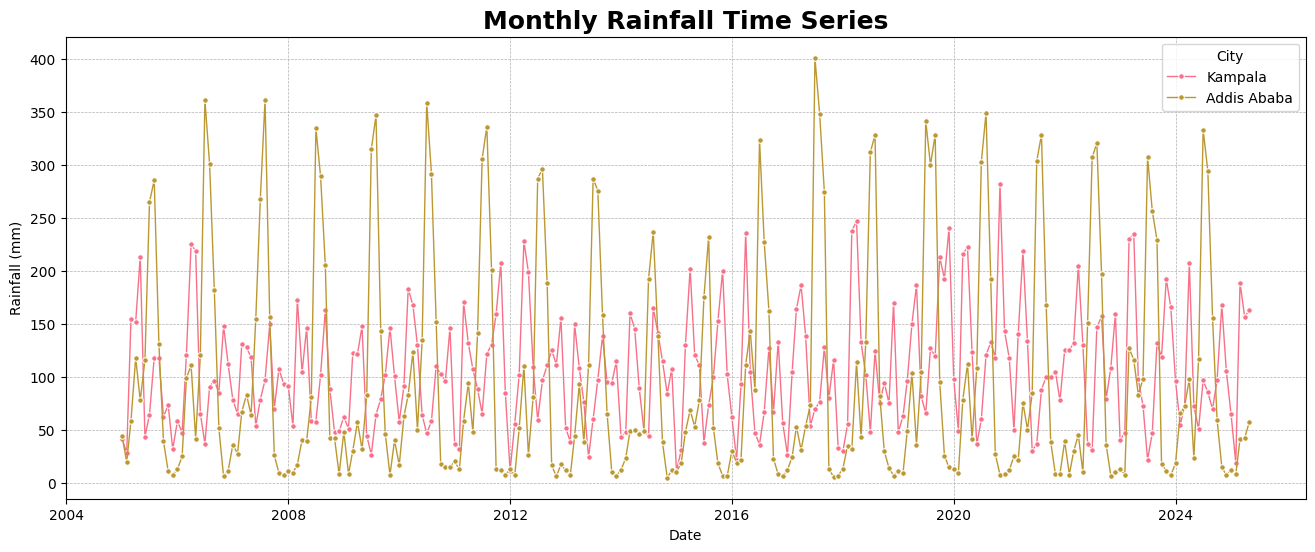

In [ ]:
# Monthly time series
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Date', y='Rainfall_mm', hue='City',
             marker='o', markersize=4, linewidth=1)
plt.title('Monthly Rainfall Time Series', fontsize=18, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

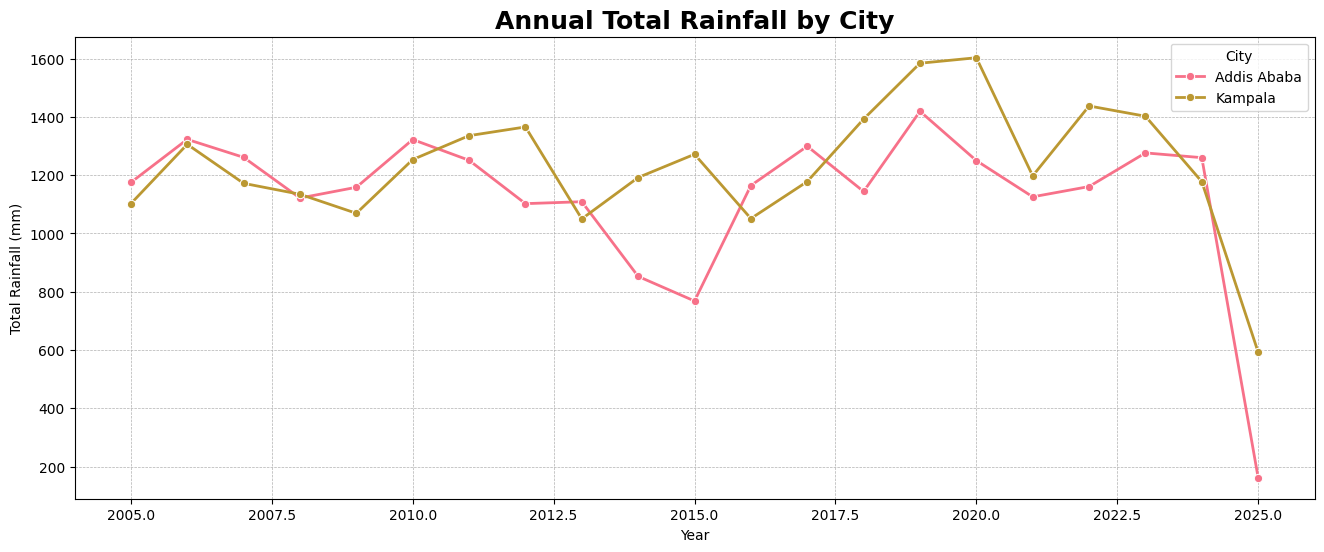

In [ ]:
# Annual rainfall
plt.figure(figsize=(16, 6)) # Create a new figure
annual_rainfall = df.groupby(['Year', 'City'])['Rainfall_mm'].sum().reset_index()
sns.lineplot(data=annual_rainfall, x='Year', y='Rainfall_mm', hue='City',
             marker='o', markersize=6, linewidth=2)
plt.title('Annual Total Rainfall by City', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

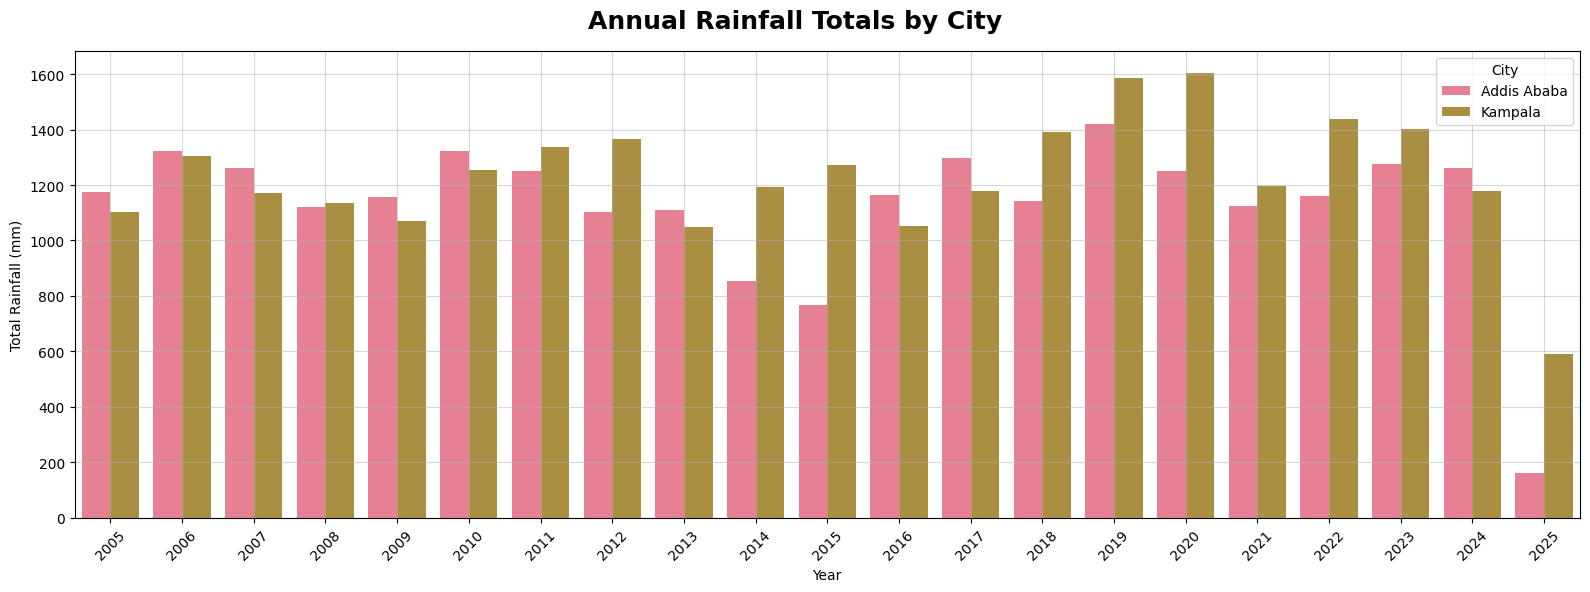

In [ ]:
# Annual rainfall totals
fig_annual, ax_annual = plt.subplots(figsize=(16, 6)) # Create a new figure and axis
fig_annual.suptitle('Annual Rainfall Totals by City', fontsize=18, fontweight='bold')

annual_data = df.groupby(['Year', 'City'])['Rainfall_mm'].sum().reset_index()
# Convert Year to string for plotting to avoid potential date interpretation issues
annual_data['Year'] = annual_data['Year'].astype(str)

sns.barplot(data=annual_data, x='Year', y='Rainfall_mm', hue='City', ax=ax_annual) # Plot on the new axis
ax_annual.set_xlabel('Year')
ax_annual.set_ylabel('Total Rainfall (mm)')
ax_annual.tick_params(axis='x', rotation=45)
ax_annual.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

# 6. Comparative Analysis Between Cities

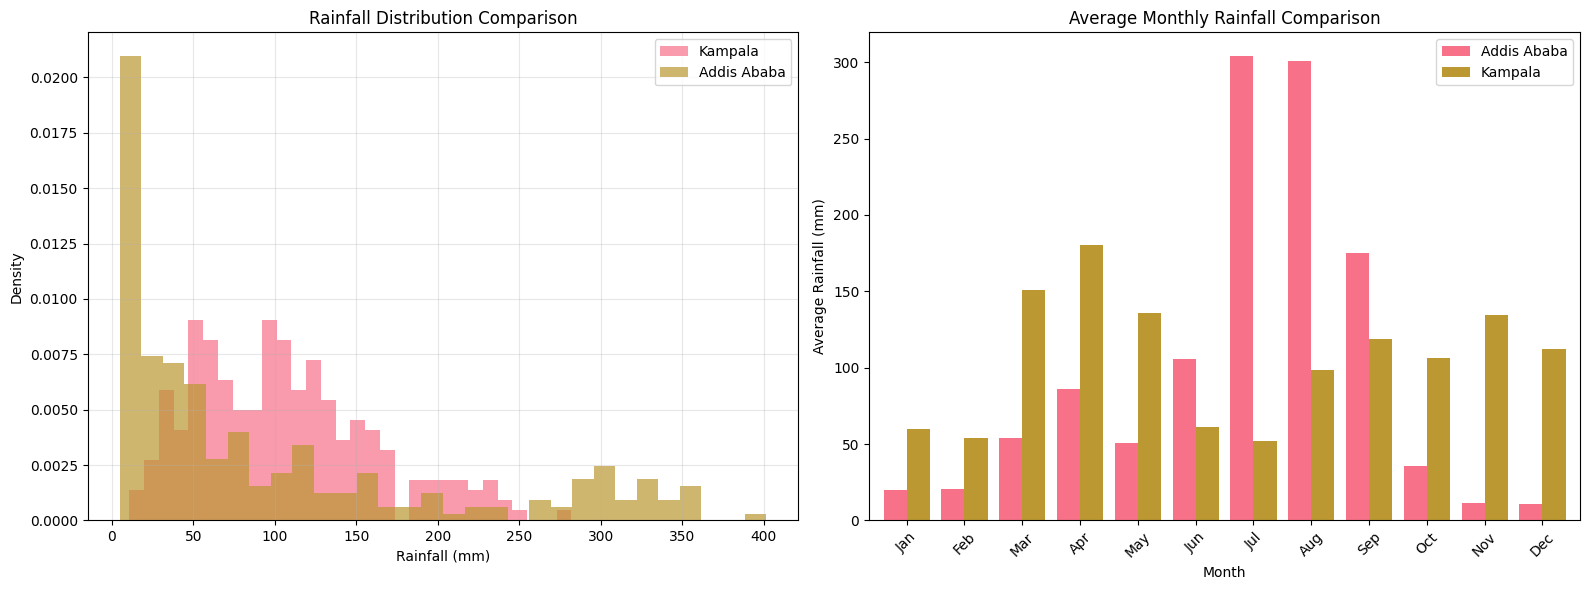

In [ ]:
kampala_data = df[df['City'] == 'Kampala']['Rainfall_mm']
addis_data = df[df['City'] == 'Addis Ababa']['Rainfall_mm']

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Changed to 1 row, 2 columns

# 1. Histogram comparison (axes[0,0] becomes axes[0])
axes[0].hist(kampala_data, bins=30, alpha=0.7, label='Kampala', density=True)
axes[0].hist(addis_data, bins=30, alpha=0.7, label='Addis Ababa', density=True)
axes[0].set_title('Rainfall Distribution Comparison')
axes[0].set_xlabel('Rainfall (mm)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Skip 2. Box plot comparison (axes[0,1])
# Skip 3. Cumulative distribution (axes[1,0])

# 4. Monthly comparison (axes[1,1] becomes axes[1])
# Define month_names if not already defined
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_comparison = df.pivot_table(values='Rainfall_mm', index='Month', columns='City', aggfunc='mean')
monthly_comparison.plot(kind='bar', ax=axes[1], width=0.8) # Use axes[1]
axes[1].set_title('Average Monthly Rainfall Comparison')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Rainfall (mm)')
axes[1].legend()
axes[1].set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.show()